## Time series 
In this notebook I present the time series of climate and soil variables for each different land cover class. 

The land cover data for our region hosts 18 subclasses. Each of them has associated a pixel value.

The associted pixel value and the name of the land cover subclass in the region of study are: : 0	no_data, 10	cropland_rainfed, 11 cropland_rainfed_herbaceous_cover, 12	cropland_rainfed_tree_or_shrub_cover, 20	cropland_irrigated, 30	mosaic_cropland, 40	mosaic_natural_vegetation, 60	tree_broadleaved_deciduous_closed_to_open, 70	tree_needleleaved_evergreen_closed_to_open, 90	tree_mixed, 100	mosaic_tree_and_shrub, 110	mosaic_herbaceous, 120	shrubland, 130	grassland, 180	shrub_or_herbaceous_cover_flooded, 190	urban, 200	bare_areas, 210	water. 

To address useful information for farmers I decided to agrupate the types of cover land in four classes: 
1. urban,
2. agriculture,
3. forest,
4. others.

In a more comprehensive project, I would have subdivided the agricultural class to study the effects of different agricultural techniques.

You can find the process used to generate the 'reclassified_land_cover.tif' file, containing four land cover classes in the study region, in the notebook located at 'ClimateFarmers/Analysis/LandCoverClass38-4.ipynb.'


## Precipitation time series  
Where 
1. class 1 is Other,
2. class 2 is Forest
3. class 3 is Agriculture
4. class 4 is Urban

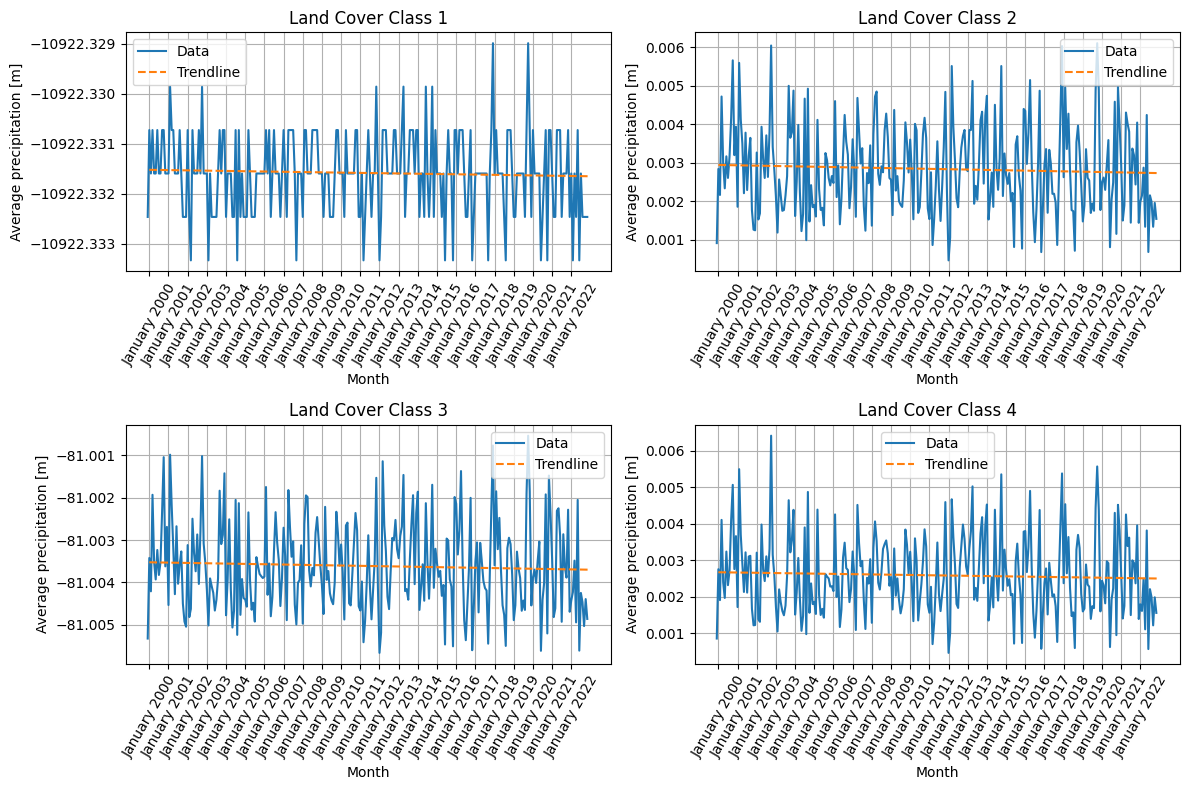

In [1]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import calendar

# Load precipitation data for all years into a single array
precipitation_path = '/home/user/Documentos/Candidaturas/ClimateFarmers/Analysis/data/precipitation.tif'
with rasterio.open(precipitation_path) as precipitation_ds:
    precipitation_data = precipitation_ds.read()

# Load land cover data
land_cover_path = '/home/user/Documentos/Candidaturas/ClimateFarmers/Analysis/data/reclassified_land_cover.tif'
with rasterio.open(land_cover_path) as land_cover_ds:
    land_cover = land_cover_ds.read(1)  # Assuming land cover is in the first band

# Define the number of land cover classes (update this based on your data)
num_land_cover_classes = 4  # Update with the correct number

# Initialize a list to store mean precipitation data for each land cover class
precipitation_by_class = []

# Loop through each land cover class
for class_value in range(1, num_land_cover_classes + 1):
    # Initialize an array to store mean precipitation data for each month
    mean_precipitation_by_month = []

    # Create a mask that is True for pixels matching the current land cover class
    mask = (land_cover == class_value)

    # Loop through each month (band) and create a mask for the current month
    for month in range(precipitation_data.shape[0]):
        # Apply the mask to precipitation data for the current month
        masked_precipitation = np.ma.masked_array(precipitation_data[month], mask=np.logical_not(mask))

        # Calculate the mean precipitation for the current land cover class and month
        mean_precipitation = np.mean(masked_precipitation)
        mean_precipitation_by_month.append(mean_precipitation)

    # Append the mean precipitation data for the current land cover class
    precipitation_by_class.append(mean_precipitation_by_month)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Loop through each land cover class and create a plot in the subplots
for class_value, mean_precipitation in enumerate(precipitation_by_class, start=1):
    # Calculate subplot row and column index
    row = (class_value - 1) // 2
    col = (class_value - 1) % 2

    # Create a plot of precipitation versus month in the specified subplot
    axs[row, col].plot(mean_precipitation, label='Data')

    # Add trendline
    x = range(1, len(mean_precipitation) + 1)
    y = mean_precipitation
    z = np.polyfit(x, y, 1)  # Fit a linear trendline (change 1 to a higher degree for a different trendline)
    p = np.poly1d(z)
    axs[row, col].plot(x, p(x), label='Trendline', linestyle='--')

    # Customize x-axis labels for January and rotate them 90 degrees
    x_ticks = [i for i in range(1, len(mean_precipitation) + 1) if i % 12 == 1]  # Select January indices
    x_labels = []
    current_year = None
    for month_idx, tick in enumerate(x_ticks):
        current_year = 2000 + month_idx  # Adjust the starting year as needed
        x_labels.append(f'January {current_year}')
    axs[row, col].set_xticks(x_ticks)
    axs[row, col].set_xticklabels(x_labels, rotation=60)  # Rotate the labels by 60 degrees

    axs[row, col].set_xlabel('Month')
    axs[row, col].set_ylabel('Average precipitation [m]')
    axs[row, col].set_title(f'Land Cover Class {class_value}')
    axs[row, col].grid(True)
    axs[row, col].legend()

    # Disable scientific notation on y-axis
    axs[row, col].get_yaxis().get_major_formatter().set_useOffset(False)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the subplots
plt.show()


For the forest and the uran areas present a small tendency to precipitation decrease. The negative values in the other and agricultural region is something I would analyse in a more detailed project. 

## Temperature time series  
where 
1. class 1 is Other,
2. class 2 is Forest
3. class 3 is Agriculture
4. class 4 is Urban

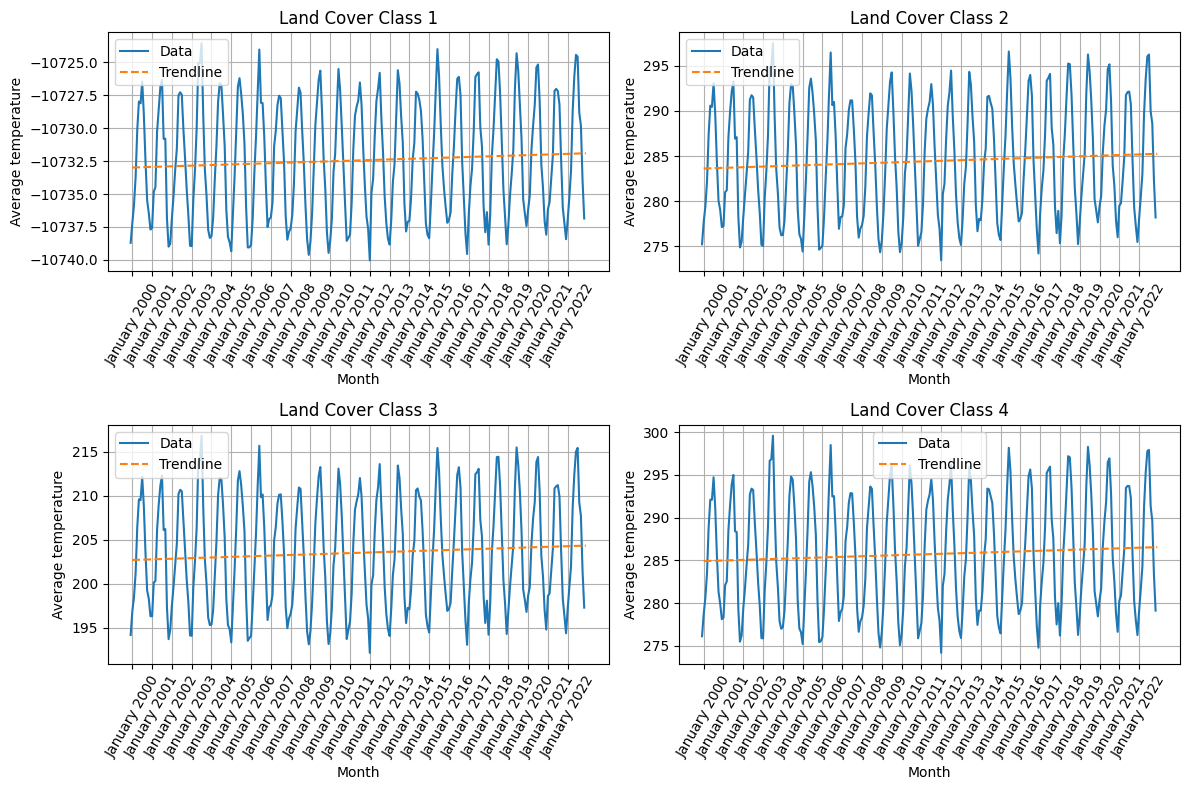

In [5]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import calendar

# Load temperature data for all years into a single array
temperature_path = '/home/user/Documentos/Candidaturas/ClimateFarmers/Analysis/data/soil_temp_l1.tif'
with rasterio.open(temperature_path) as temperature_ds:
    temperature_data = temperature_ds.read()

# Load land cover data
land_cover_path = '/home/user/Documentos/Candidaturas/ClimateFarmers/Analysis/data/reclassified_land_cover.tif'
with rasterio.open(land_cover_path) as land_cover_ds:
    land_cover = land_cover_ds.read(1)  # Assuming land cover is in the first band

# Define the number of land cover classes (update this based on your data)
num_land_cover_classes = 4  # Update with the correct number

# Initialize a list to store mean temperature data for each land cover class
temperature_by_class = []

# Loop through each land cover class
for class_value in range(1, num_land_cover_classes + 1):
    # Initialize an array to store mean temperature data for each month
    mean_temperature_by_month = []

    # Create a mask that is True for pixels matching the current land cover class
    mask = (land_cover == class_value)

    # Loop through each month (band) and create a mask for the current month
    for month in range(temperature_data.shape[0]):
        # Apply the mask to temperature data for the current month
        masked_temperature = np.ma.masked_array(temperature_data[month], mask=np.logical_not(mask))

        # Calculate the mean temperature for the current land cover class and month
        mean_temperature = np.mean(masked_temperature)
        mean_temperature_by_month.append(mean_temperature)

    # Append the mean temperature data for the current land cover class
    temperature_by_class.append(mean_temperature_by_month)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Loop through each land cover class and create a plot in the subplots
for class_value, mean_temperature in enumerate(temperature_by_class, start=1):
    # Calculate subplot row and column index
    row = (class_value - 1) // 2
    col = (class_value - 1) % 2

    # Create a plot of temperature versus month in the specified subplot
    axs[row, col].plot(mean_temperature, label='Data')

    # Add trendline
    x = range(1, len(mean_temperature) + 1)
    y = mean_temperature
    z = np.polyfit(x, y, 1)  # Fit a linear trendline (change 1 to a higher degree for a different trendline)
    p = np.poly1d(z)
    axs[row, col].plot(x, p(x), label='Trendline', linestyle='--')

    # Customize x-axis labels for January and rotate them 90 degrees
    x_ticks = [i for i in range(1, len(mean_temperature) + 1) if i % 12 == 1]  # Select January indices
    x_labels = []
    current_year = None
    for month_idx, tick in enumerate(x_ticks):
        current_year = 2000 + month_idx  # Adjust the starting year as needed
        x_labels.append(f'January {current_year}')
    axs[row, col].set_xticks(x_ticks)
    axs[row, col].set_xticklabels(x_labels, rotation=60)  # Rotate the labels by 60 degrees

    axs[row, col].set_xlabel('Month')
    axs[row, col].set_ylabel('Average temperature K')
    axs[row, col].set_title(f'Land Cover Class {class_value}')
    axs[row, col].grid(True)
    axs[row, col].legend()

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the subplots
plt.show()


We observe a in agriculture, forest and urban areas a soil tempreature tendency to increase. It could be interesting to compare the change in the slope of the tendency line of the soil temperature with the inclusion of new agricultural practices in the region. 

## Evapotranspiration time series  
where 
1. class 1 is Other,
2. class 2 is Forest
3. class 3 is Agriculture
4. class 4 is Urban

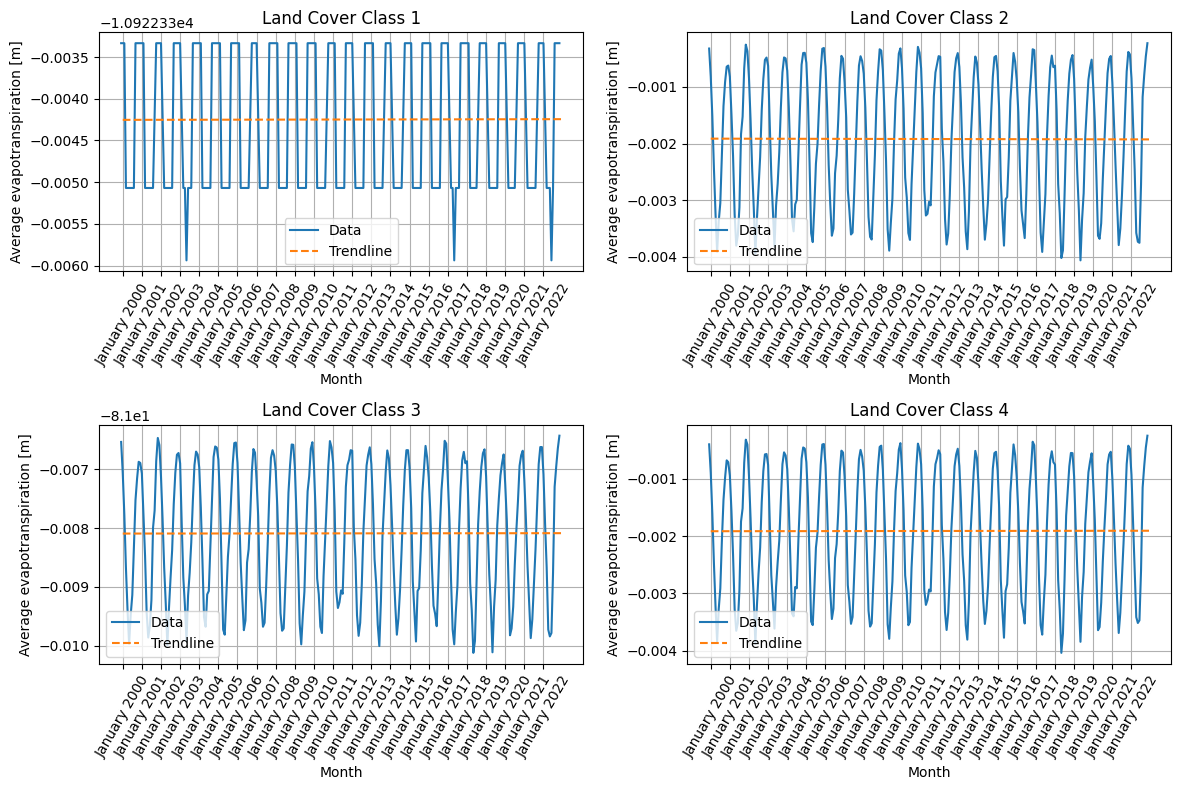

In [13]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import calendar

# Load evapotranspiration data for all years into a single array
evapotranspiration_path = '/home/user/Documentos/Candidaturas/ClimateFarmers/Analysis/data/evapotranspiration.tif'
with rasterio.open(evapotranspiration_path) as evapotranspiration_ds:
    evapotranspiration_data = evapotranspiration_ds.read()

# Load land cover data
land_cover_path = '/home/user/Documentos/Candidaturas/ClimateFarmers/Analysis/data/reclassified_land_cover.tif'
with rasterio.open(land_cover_path) as land_cover_ds:
    land_cover = land_cover_ds.read(1)  # Assuming land cover is in the first band

# Define the number of land cover classes (update this based on your data)
num_land_cover_classes = 4  # Update with the correct number

# Initialize a list to store mean evapotranspiration data for each land cover class
evapotranspiration_by_class = []

# Loop through each land cover class
for class_value in range(1, num_land_cover_classes + 1):
    # Initialize an array to store mean evapotranspiration data for each month
    mean_evapotranspiration_by_month = []

    # Create a mask that is True for pixels matching the current land cover class
    mask = (land_cover == class_value)

    # Loop through each month (band) and create a mask for the current month
    for month in range(evapotranspiration_data.shape[0]):
        # Apply the mask to evapotranspiration data for the current month
        masked_evapotranspiration = np.ma.masked_array(evapotranspiration_data[month], mask=np.logical_not(mask))

        # Calculate the mean evapotranspiration for the current land cover class and month
        mean_evapotranspiration = np.mean(masked_evapotranspiration)
        mean_evapotranspiration_by_month.append(mean_evapotranspiration)

    # Append the mean evapotranspiration data for the current land cover class
    evapotranspiration_by_class.append(mean_evapotranspiration_by_month)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Loop through each land cover class and create a plot in the subplots
for class_value, mean_evapotranspiration in enumerate(evapotranspiration_by_class, start=1):
    # Calculate subplot row and column index
    row = (class_value - 1) // 2
    col = (class_value - 1) % 2

    # Create a plot of evapotranspiration versus month in the specified subplot
    axs[row, col].plot(mean_evapotranspiration, label='Data')

    # Add trendline
    x = range(1, len(mean_evapotranspiration) + 1)
    y = mean_evapotranspiration
    z = np.polyfit(x, y, 1)  # Fit a linear trendline (change 1 to a higher degree for a different trendline)
    p = np.poly1d(z)
    axs[row, col].plot(x, p(x), label='Trendline', linestyle='--')

    # Customize x-axis labels for January and rotate them 90 degrees
    x_ticks = [i for i in range(1, len(mean_evapotranspiration) + 1) if i % 12 == 1]  # Select January indices
    x_labels = []
    current_year = None
    for month_idx, tick in enumerate(x_ticks):
        current_year = 2000 + month_idx  # Adjust the starting year as needed
        x_labels.append(f'January {current_year}')
    axs[row, col].set_xticks(x_ticks)
    axs[row, col].set_xticklabels(x_labels, rotation=60)  # Rotate the labels by 60 degrees

    axs[row, col].set_xlabel('Month')
    axs[row, col].set_ylabel('Average evapotranspiration [m]')
    axs[row, col].set_title(f'Land Cover Class {class_value}')
    axs[row, col].grid(True)
    axs[row, col].legend()

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the subplots
plt.show()
